### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [4]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [5]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [6]:
df.shape

(458311, 37)

In [7]:
features += ['CRS_DEP_TIME']

model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

[Text(0.5,1,u'Probability of Delay\n Based on Day of Week and Time of Day')]

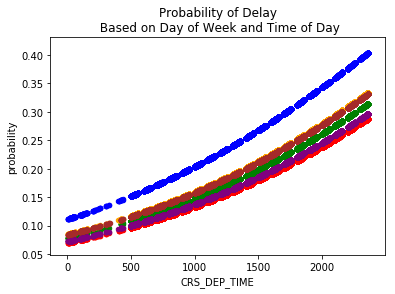

In [8]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


### Other Answers: visualizing Airline or the inverse

[Text(0.5,1,u'Probability of Admission\n Based on Carrier and Time of Day')]

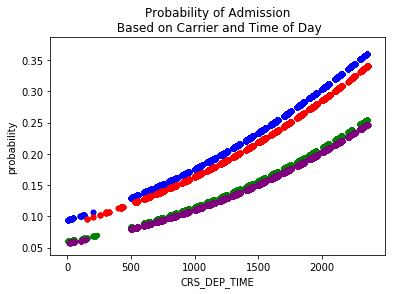

In [9]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Admission\n Based on Carrier and Time of Day')

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [10]:
from sklearn import dummy, metrics

In [11]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [12]:
df['probability_0']

0         0
1         0
2         0
3         0
4         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
26        0
27        0
28        0
29        0
30        0
31        0
         ..
469938    0
469939    0
469940    0
469941    0
469942    1
469943    0
469944    0
469945    1
469946    0
469947    0
469948    0
469949    1
469950    0
469951    0
469952    0
469953    1
469954    1
469955    0
469956    0
469957    0
469958    0
469959    0
469960    1
469961    0
469962    0
469963    1
469964    0
469965    1
469966    0
469967    0
Name: probability_0, Length: 458311, dtype: int64

In [13]:
df.shape

(458311, 40)

[(0, 1),
 Text(0,0.5,u''),
 (0, 1),
 Text(0.5,0,u''),
 Text(0.5,1,u'Area Under the Curve for prediction delayed=1')]

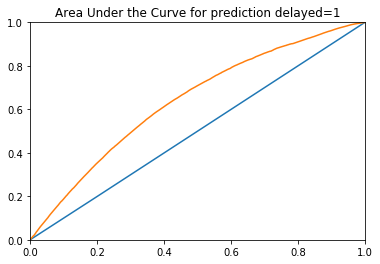

In [14]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

#### Visualizing Precision / Recall

In [15]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]


model = lm.LogisticRegression()
model.fit(df[features[1:]], df.DEP_DEL15)
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]

[(0, 1),
 Text(0,0.5,u''),
 (0, 1),
 Text(0.5,0,u''),
 Text(0.5,1,u'Precision Recall Curve for prediction delayed=1')]

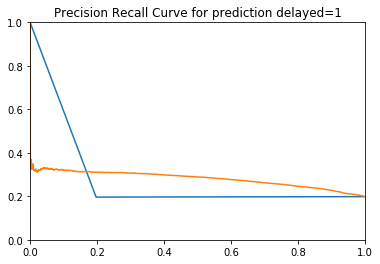

In [16]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))